In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join as oj

In [14]:
os.listdir('results/nonl2unsignedunnormed')

['dataid361272',
 'dataid7592',
 'dataid361237',
 'dataid9971',
 'dataid3903',
 'dataid14954',
 'dataid361261',
 'dataid361259',
 'dataid361253',
 'dataid3021',
 'dataid125920',
 'dataid361619',
 'dataid361254',
 'dataid9957',
 'dataid361621',
 'dataid3904',
 'dataid361266',
 'dataid9976',
 'dataid361247',
 'dataid3917',
 'dataid3913',
 'dataid9978',
 'dataid361249',
 'dataid361243',
 'dataid361234',
 'dataid10101',
 'dataid361617',
 'dataid14965',
 'dataid361250',
 'dataid146820',
 'dataid361257',
 'dataid361622',
 'dataid31',
 'dataid361244',
 'dataid167141',
 'dataid9977',
 'dataid361255',
 'dataid361618',
 'dataid361267',
 'dataid14952',
 'dataid3902',
 'dataid361260',
 'dataid49',
 'dataid43',
 'dataid219',
 'dataid361252',
 'dataid361258',
 'dataid167120',
 'dataid15',
 'dataid361241',
 'dataid361236',
 'dataid29',
 'dataid9946',
 'dataid361256',
 'dataid361623',
 'dataid361264',
 'dataid10093',
 'dataid9952',
 'dataid361269',
 'dataid37',
 'dataid146819',
 'dataid3',
 'dataid361

In [15]:
# get all of the dataids in results/pipeline2
dataids = []
binary_class_ids = {31, 10101, 3913, 3, 3917, 9957, 9946, 3918, 3903, 37,
                        9971, 9952, 3902, 49, 43, 9978, 10093, 219, 9976, 14965,
                        9977, 15, 29, 14952, 125920, 3904, 9910, 3021, 7592,
                        146820, 146819, 14954, 167141, 167120, 167125}
for filename in os.listdir('results/nonl2unsignedunnormed'):
    # get digits of filename
    id = filename[6:]
    # print(id)
    if int(id) in binary_class_ids:
        dataids.append(id)
dataids

['7592',
 '9971',
 '3903',
 '14954',
 '3021',
 '125920',
 '9957',
 '3904',
 '9976',
 '3917',
 '3913',
 '9978',
 '10101',
 '14965',
 '146820',
 '31',
 '167141',
 '9977',
 '14952',
 '3902',
 '49',
 '43',
 '219',
 '167120',
 '15',
 '29',
 '9946',
 '10093',
 '9952',
 '37',
 '146819',
 '3',
 '3918']

In [16]:
# set the path we want to look at
# dataids = ["361242", "361251", "361253", "361259", "361260"]
# dataids = ["361242", "361251", "361253", "361254", "361256", "361259", "361260", "361622"]
seed = "1"
metric = "accuracy"
pipeline = 2
clustertype = "hierarchical"
paths = []
for dataid in dataids:
    # paths.append(oj("results", f"pipeline{pipeline}", f"dataid{dataid}", f"seed{seed}", f"metric{metric}", str(clustertype)))
    paths.append(oj("results", "nonl2unsignedunnormed", f"dataid{dataid}", f"seed{seed}", f"metric{metric}", str(clustertype)))

In [19]:
data_results = []
for path in paths:
    # if path exists
    if not os.path.exists(path):
        continue
    files = os.listdir(path)
    method_results = []
    for file in files:
        method_result = pd.read_csv(oj(path, file))
        method_result = method_result.rename(columns={"accuracy": file[:-4]})
        method_results.append(method_result)
    data_result = pd.concat(method_results, axis=1)
    data_result = data_result.loc[:, ~data_result.columns.str.contains('^Unnamed')]
    data_result = data_result.loc[:, ~data_result.columns.duplicated()]
    data_results.append(data_result)

In [22]:
# in each data_result, keep only nclust, lmdi_lasso, lmdi_ridge, shap, lime, rawdata
for i in range(len(data_results)):
    data_results[i] = data_results[i][["nclust", "lmdi_lasso", "shap", "lime", "rawdata"]]

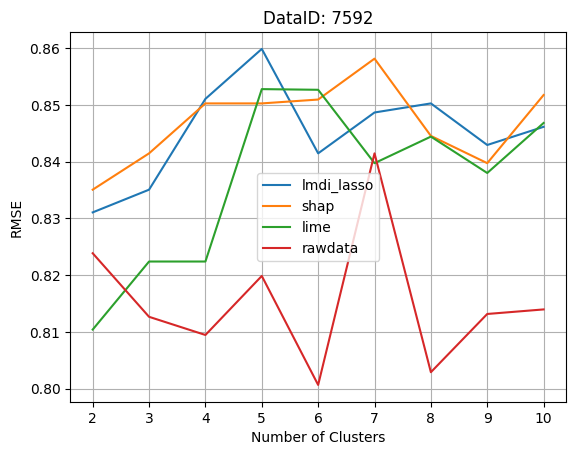

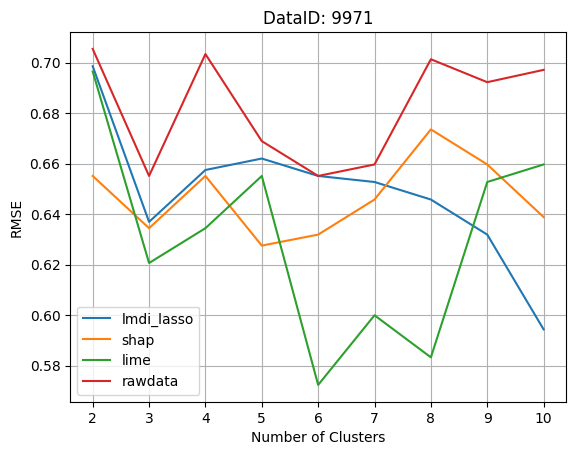

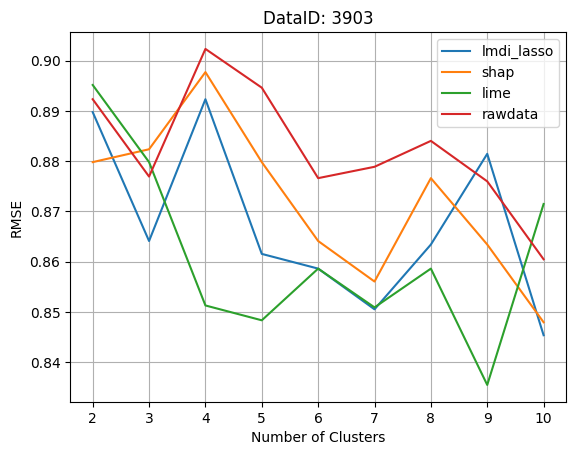

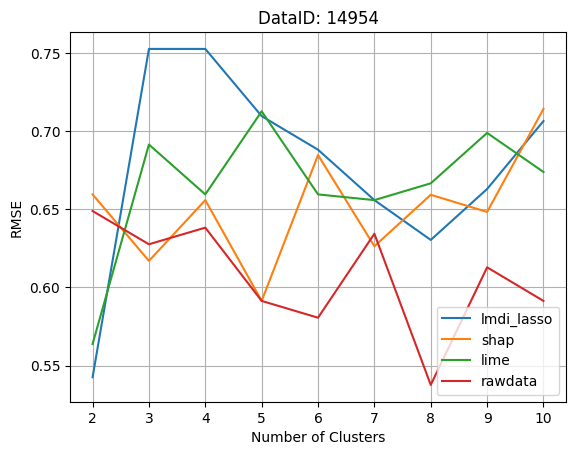

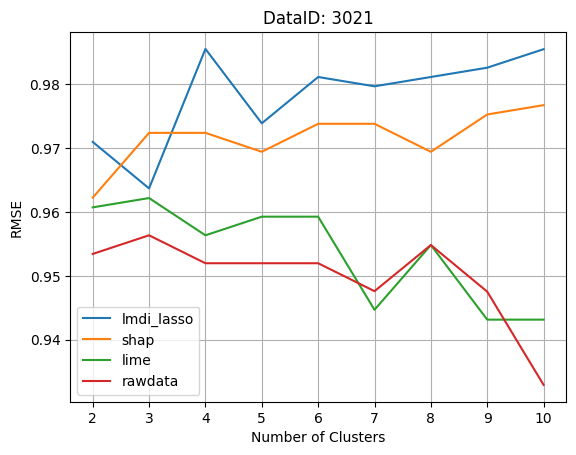

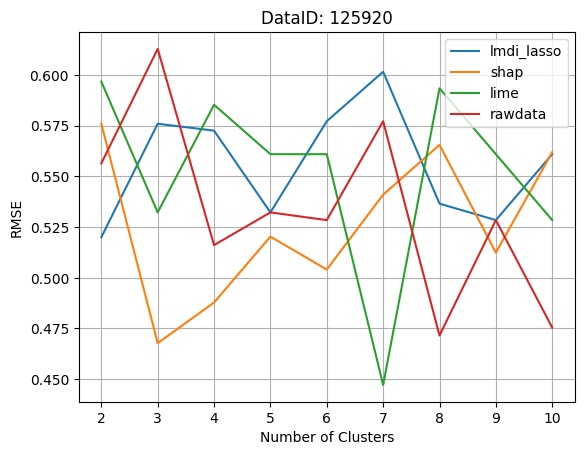

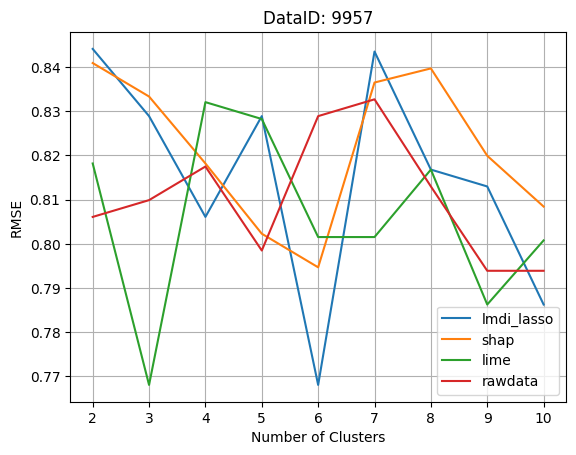

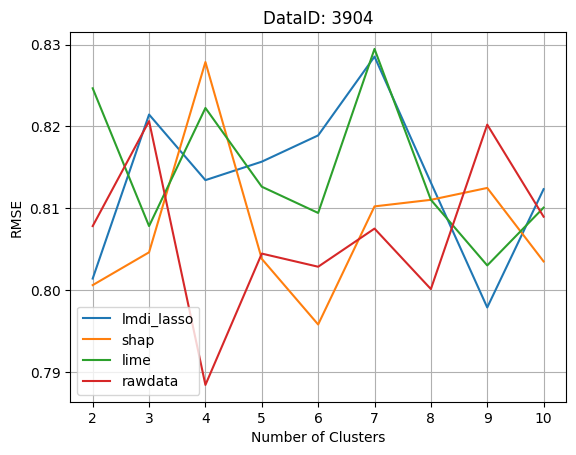

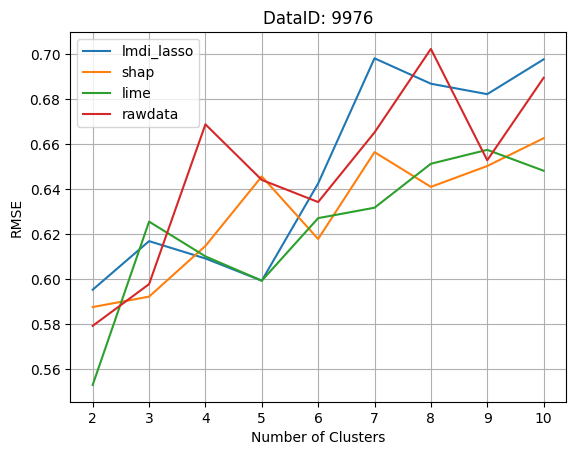

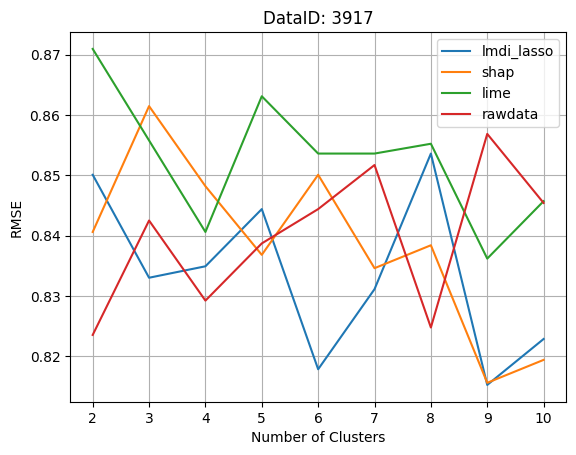

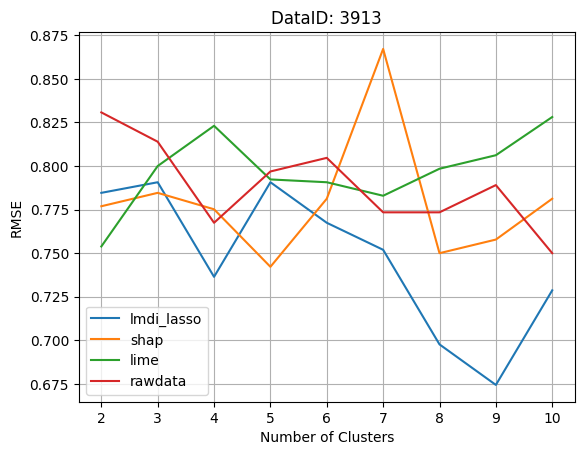

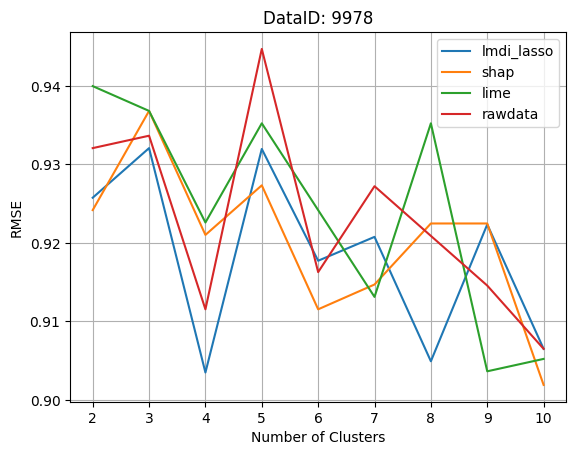

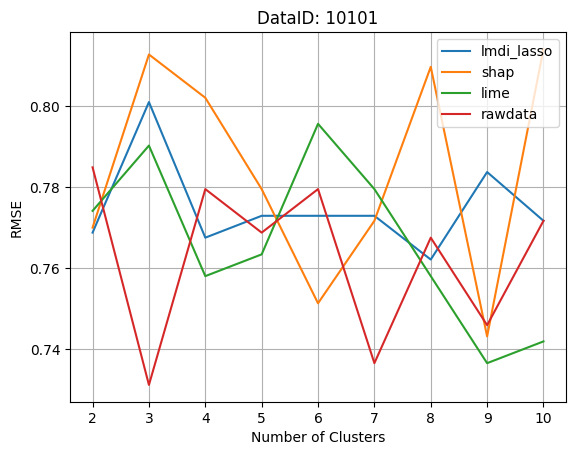

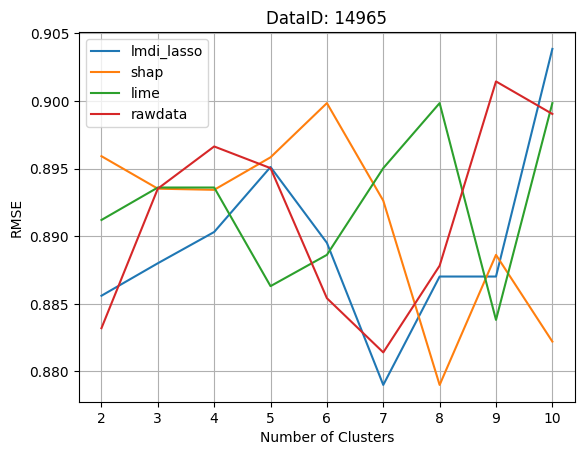

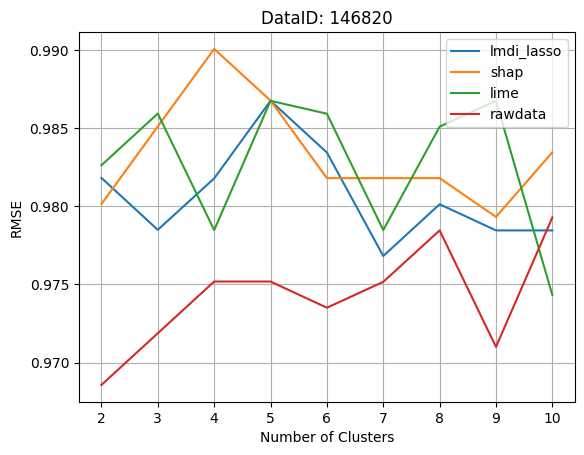

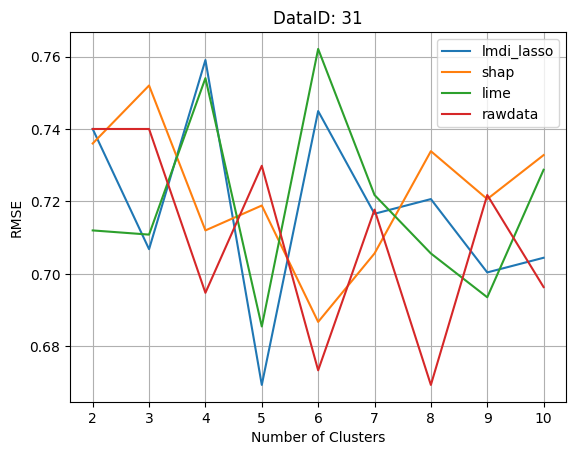

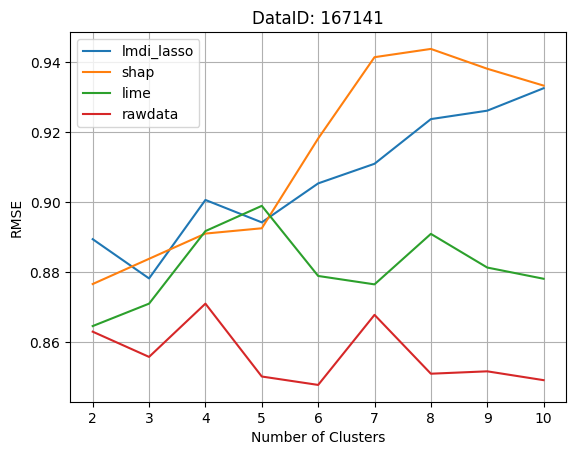

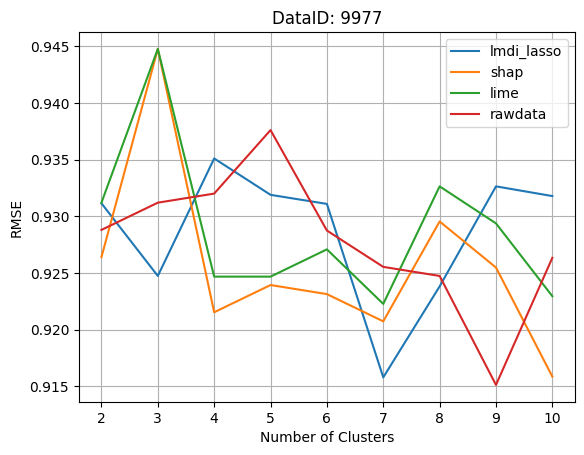

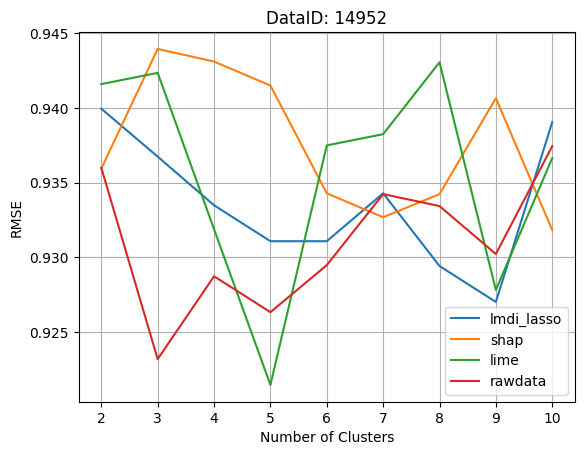

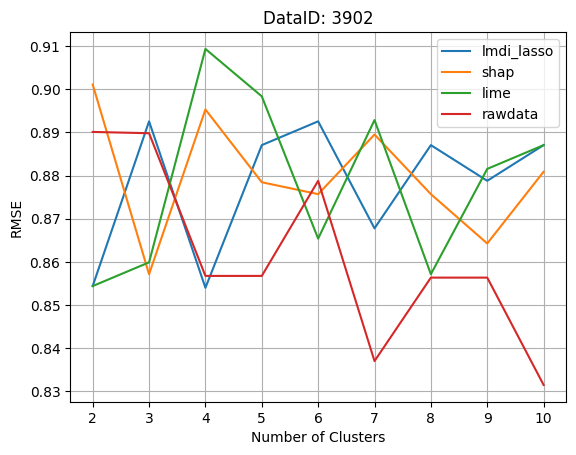

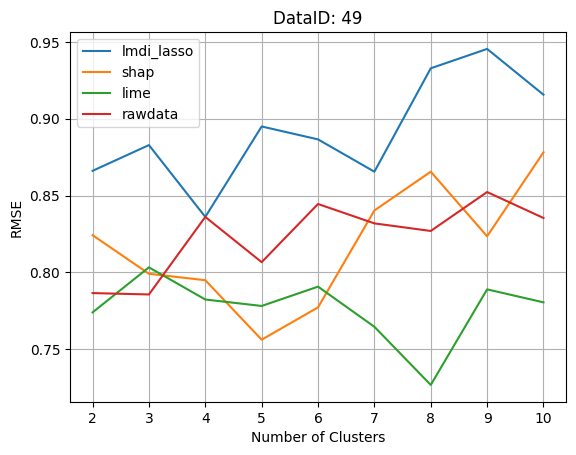

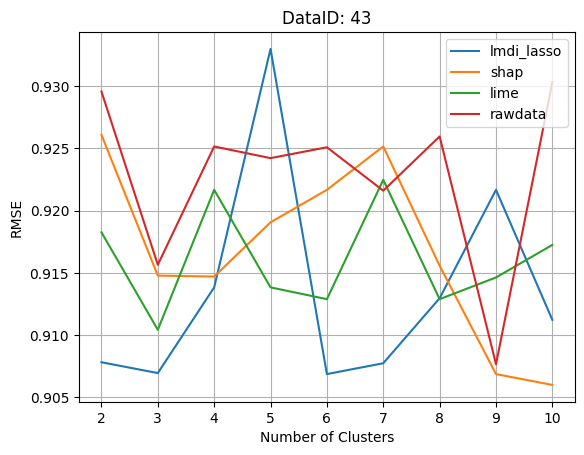

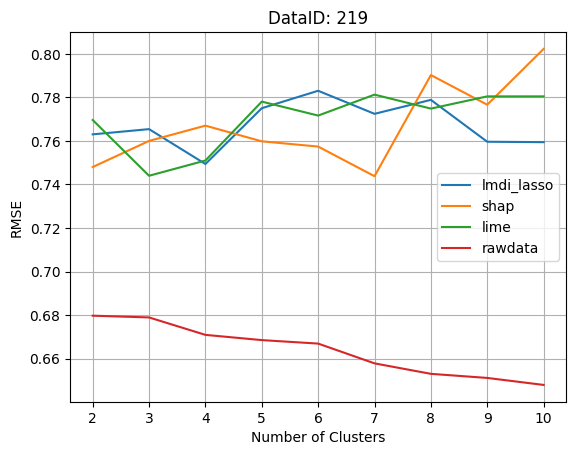

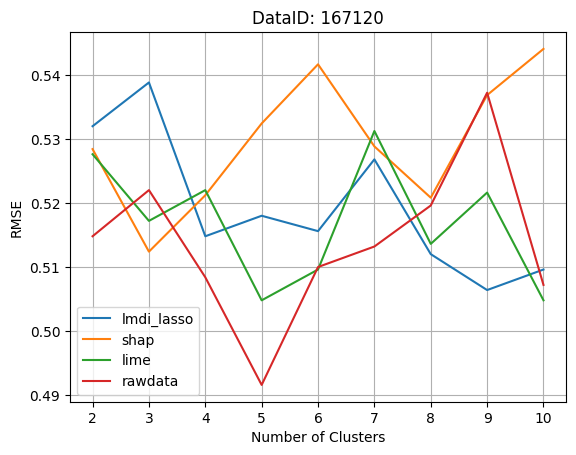

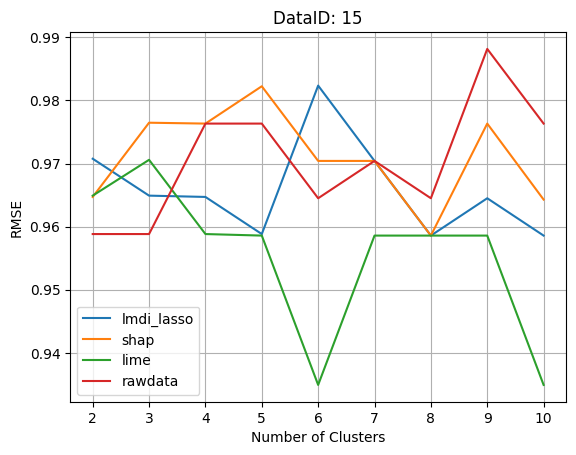

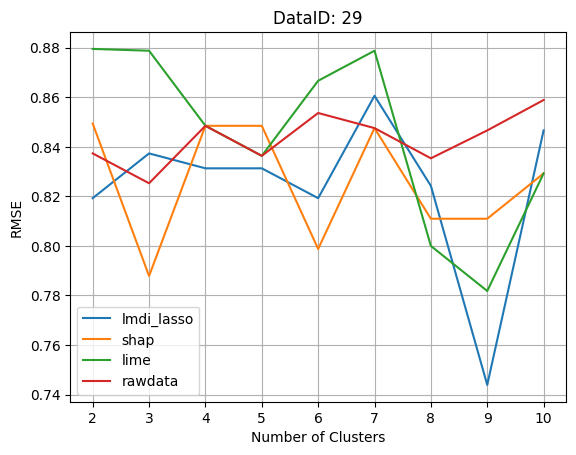

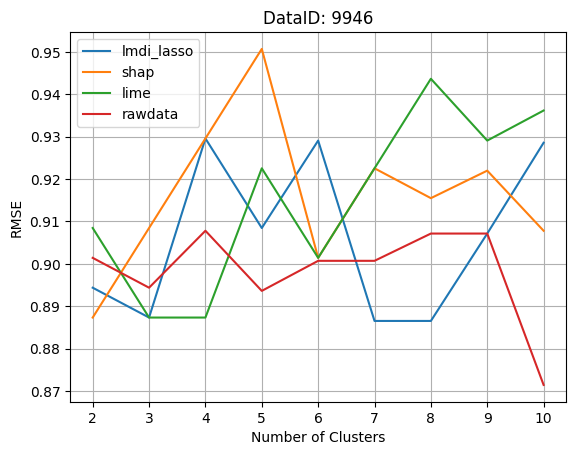

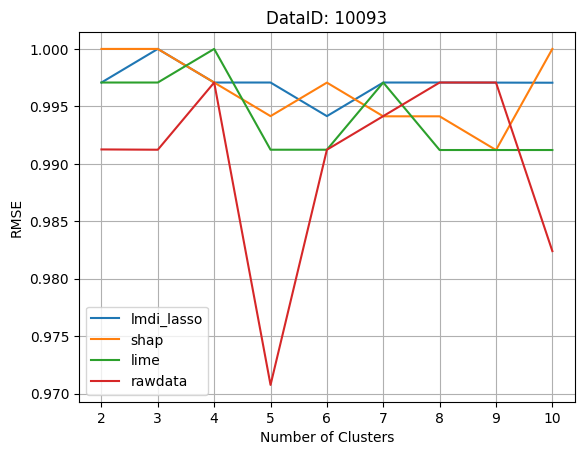

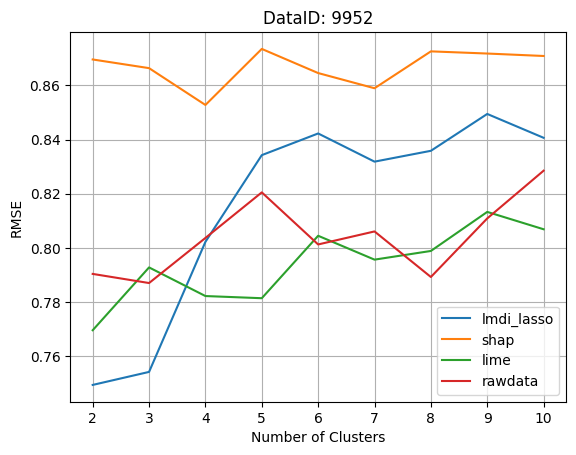

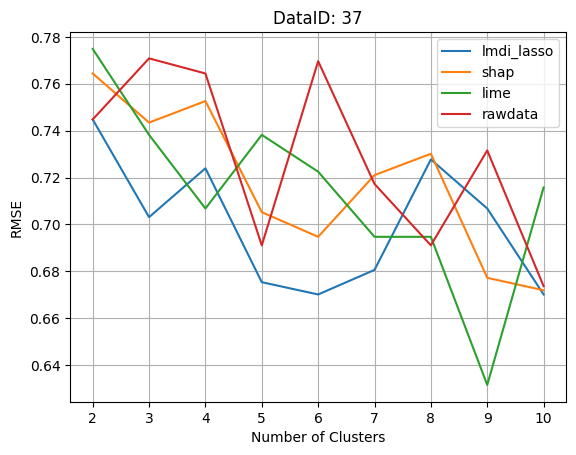

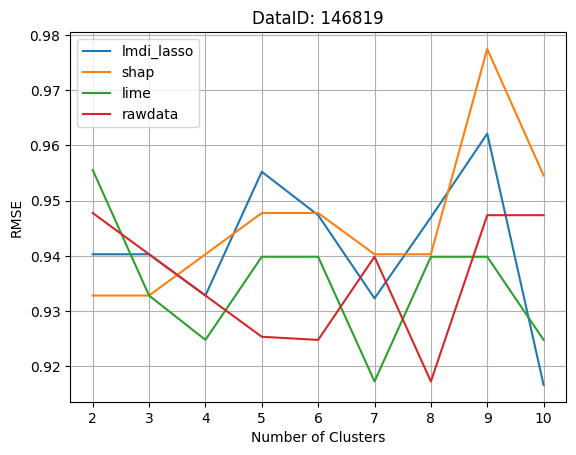

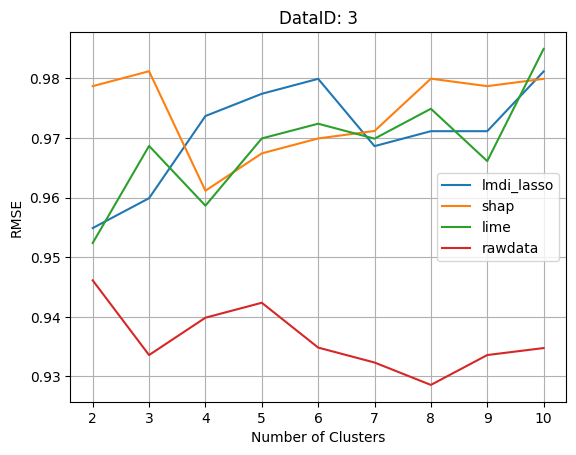

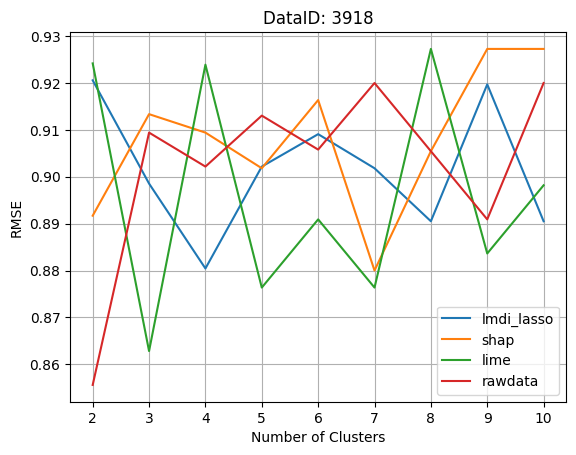

In [23]:
# plot the data, with nclust on x-axis and the rest being lines
i = 0
for data_result in data_results:
    data_result = data_result.set_index("nclust")
    data_result.plot(grid=True)
    # y axis label is RMSE
    plt.ylabel("RMSE")
    # x axis label is number of clusters
    plt.xlabel("Number of Clusters")
    # title is the dataid
    plt.title("DataID: " + dataids[i])
    # move legend to side
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # remove legend
    #plt.legend().remove()
    # show legend
    plt.legend()
    plt.show()
    i+=1


In [24]:
data_results[0]

,nclust,lmdi_lasso,shap,lime,rawdata
0,2,0.831065,0.835068,0.810400,0.823859
1,3,0.835068,0.841473,0.822400,0.812650
2,4,0.851081,0.850280,0.822400,0.809448
3,5,0.859888,0.850280,0.852800,0.819856
4,6,0.841473,0.850962,0.852682,0.800641
5,7,0.848679,0.858173,0.839744,0.841473
6,8,0.850280,0.844551,0.844427,0.802885
7,9,0.842949,0.839744,0.838011,0.813152
8,10,0.846154,0.851763,0.846832,0.813953


In [8]:
# plot the data, only shap and aloo_l2_unsigned_nonnormed_leafavg_rank
# i=0
# for data_result in data_results:
#     data_result = data_result.set_index("nclust")
#     data_result[["shap", "nonloo_l2_signed_nonnormed_leafavg_rank"]].plot(grid=True)
#     # move legend to side
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     # call aloo_l2_unsigned_nonnormed_leafavg_rank lmdi+
#     plt.legend(["SHAP", "LMDI+"])
#     # y axis label is RMSE
#     plt.ylabel("RMSE")
#     # x axis label is number of clusters
#     plt.xlabel("Number of Clusters")
#     # title is the dataid
#     plt.title("DataID: " + dataids[i])
#     plt.show()
#     i+=1

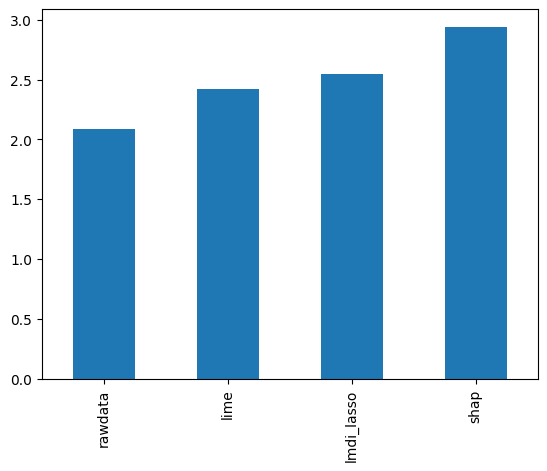

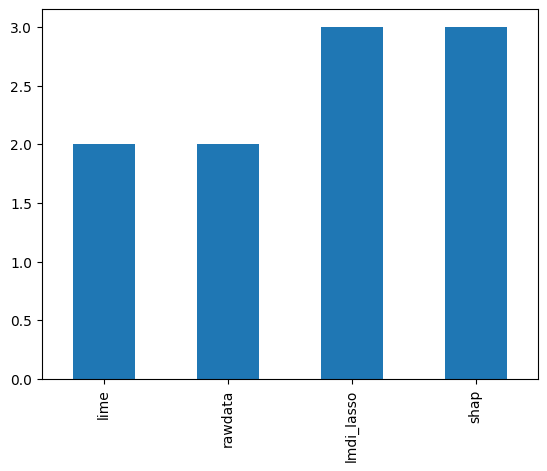

In [25]:
auroc_ranks = []
for data_result in data_results:
    auroc = data_result.drop("nclust", axis=1).apply(np.trapz, x=data_result["nclust"])
    # convert to ranking, i.e. 1 is lowest, 2 is second lowest, etc.
    auroc_rank = auroc.rank()
    auroc_ranks.append(auroc_rank)
# merge series in auroc_ranks by averaging the ranks corresponding to the same names
auroc_ranks = pd.concat(auroc_ranks, axis=1)
auroc_ranks_mean = auroc_ranks.mean(axis=1)
auroc_ranks_median = auroc_ranks.median(axis=1)
auroc_ranks_mean = auroc_ranks_mean.sort_values()
auroc_ranks_median = auroc_ranks_median.sort_values()
auroc_ranks_mean.plot(kind="bar")
plt.show()
auroc_ranks_median.plot(kind="bar")
plt.show()

In [26]:
auroc_ranks

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
lmdi_lasso,3.0,3.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,1.0,...,3.0,2.0,1.0,2.0,4.0,3.0,1.0,3.0,3.0,2.0
shap,4.0,2.0,3.0,2.0,3.0,1.0,4.0,2.0,2.0,2.0,...,4.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0
lime,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,1.0,4.0,...,2.0,1.0,4.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0
rawdata,1.0,4.0,4.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,...,1.0,3.0,3.0,1.0,1.0,2.0,4.0,2.0,1.0,3.0


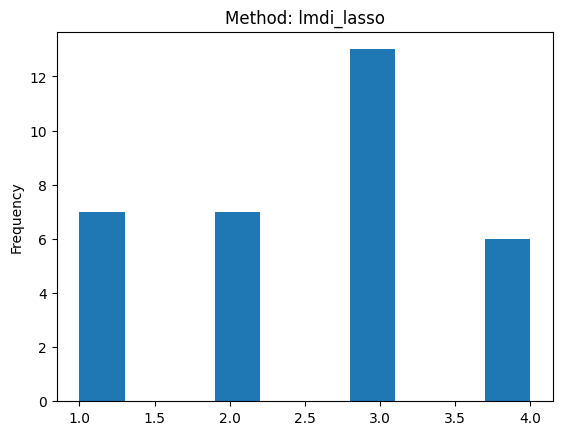

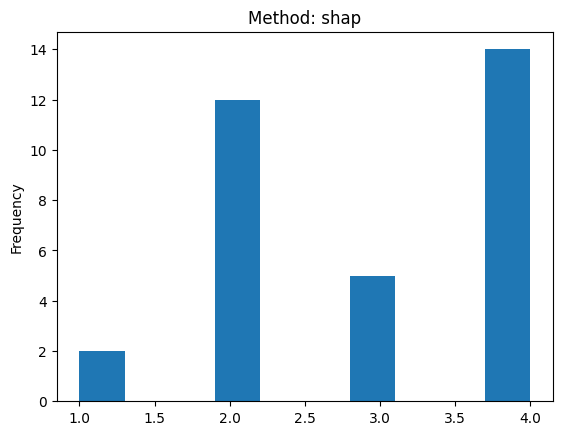

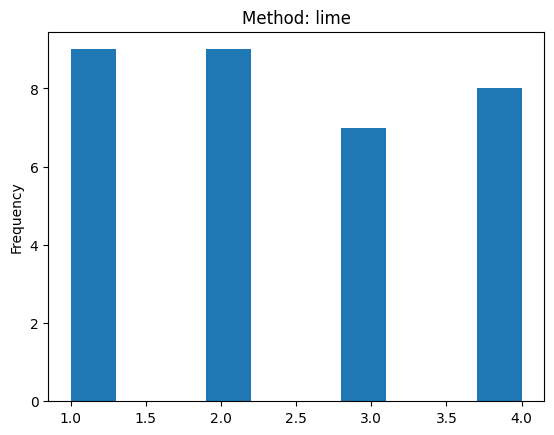

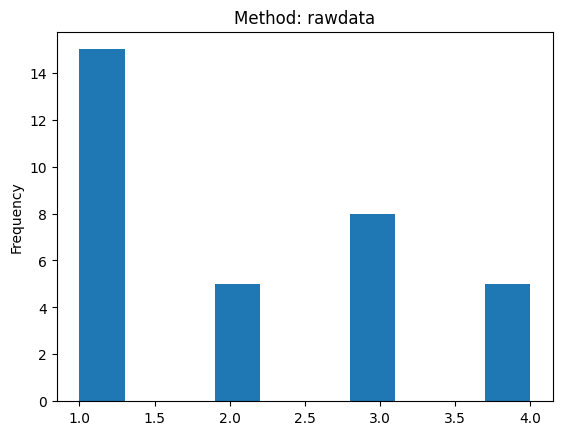

In [27]:
# for each row in auroc_ranks, plot a histogram of the ranks
for i in range(auroc_ranks.shape[0]):
    auroc_ranks.iloc[i].plot(kind="hist")
    plt.title("Method: " + auroc_ranks.index[i])
    plt.show()

    